In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("gurgaon_10k.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head(3)

,PROP_ID,PHOTO_URL,MEDIUM_PHOTO_URL,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,...,LOCALITY_WO_CITY,profile,xid,metadata,location,BUILTUP_SQFT,SUPER_SQFT,COMMON_FURNISHING_ATTRIBUTES,QUALITY_SCORE,FURNISHING_ATTRIBUTES
0,O71585872,https://mediacdn.99acres.com/media1/22409/13/4...,https://mediacdn.99acres.com/media1/22409/13/4...,S,4 bhk flat for resale in alpha corp gurgaon one,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,...,Sector 84,"{'CONTACT_NAME': 'gaurav khosla', 'CONTACT_COM...","{'PROJECTID': 5096, 'PROJ_NAME': 'Alpha Corp G...","{'PROP_PHOTO_COUNT': '4', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,NaN,NaN,NaN,NaN
1,T71585466,https://mediacdn.99acres.com/media1/22425/6/44...,https://mediacdn.99acres.com/media1/22425/6/44...,S,"Explore dlf ultima, an upscale ready-To-Move h...",Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,...,Sector 81,"{'CONTACT_NAME': 'Kamal', 'CONTACT_COMPANY_NAM...","{'PROJECTID': 7182, 'PROJ_NAME': 'DLF The Ulti...","{'PROP_PHOTO_COUNT': '4', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,NaN,NaN,NaN,NaN
2,D71549524,https://mediacdn.99acres.com/media1/22386/13/4...,https://mediacdn.99acres.com/media1/22386/13/4...,R,A 3 bhk flat for rent in sector 66 gurgaon clo...,Residential Apartment,Gurgaon,Sector 66 Gurgaon,NaN,0,...,Sector 66,"{'CONTACT_NAME': 'Sandeep', 'CONTACT_COMPANY_N...","{'PROJECTID': 19, 'PROJ_NAME': 'Emaar MGF The ...","{'PROP_PHOTO_COUNT': '1', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",1920.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(10704, 67)

In [6]:
df.columns

Index(['PROP_ID', 'PHOTO_URL', 'MEDIUM_PHOTO_URL', 'PREFERENCE', 'DESCRIPTION',
       'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'TRANSACT_TYPE', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'FEATURES',
       'REGISTER_DATE', 'PROP_NAME', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT',
       'LISTING', 'BUILDING_ID', 'CARPET_SQFT', 'SUPERBUILTUP_SQFT',
       'BROKERAGE', 'MAP_DETAILS', 'FSL_Data', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'FORMATTED', 'AMENITIES', 'TOP_USPS', 'PD_URL',
       'EXPIRY_DATE', 'GROUP_NAME', 'AREA', 'PRICE', 'PROP_HEADING',
       'PROP_DETAILS_URL', 'CLASS_HEADING', 'CLASS_LABEL', 'SECONDARY_TAGS',
       'PROPERTY_IMAGES', 'THUMBNAIL_IMAGES', 'TOTAL_LANDMARK_COUNT',
       'FORMATTED_LANDMARK_DETAILS', 'CONTACT_NAME', 'CONTACT_COMPANY_NAME',
       'DEALER_PHOTO_URL', 'SOCIETY_NAME', 'BUILDING_NAME', 'CITY_ID',
       'LOCALITY_WO_CITY', 'profile', 'xid', 'metad

In [7]:
#we can drop unwanted columns like id ,photo url etc.

drp_col =['PROP_ID','PHOTO_URL','DESCRIPTION','BUILDING_ID', 'CARPET_SQFT','LISTING','BROKERAGE','AMENITIES',
         'PD_URL','PROP_HEADING','PROP_DETAILS_URL','CLASS_HEADING', 'CLASS_LABEL', 'SECONDARY_TAGS','PROPERTY_IMAGES', 'THUMBNAIL_IMAGES',
          'DEALER_PHOTO_URL','CITY_ID','REGISTER_DATE','EXPIRY_DATE', 'GROUP_NAME','COMMON_FURNISHING_ATTRIBUTES','QUALITY_SCORE',
          'FURNISHING_ATTRIBUTES','FORMATTED_LANDMARK_DETAILS', 'CONTACT_NAME', 'CONTACT_COMPANY_NAME'
         ]

In [8]:

#drop the columns
df1 = df.drop(columns=drp_col,axis=1)

In [9]:
df1.shape

(10704, 40)

## we can divide the column into categorical column and numerical column by using function

In [10]:
def get_cat_and_num(df1):
    cat_col =[]
    num_col =[]
    for col in df1.columns:
        if df1[col].dtype =='O':
            cat_col.append(col)
        elif df1[col].dtype=='int64' or df1[col].dtype=='float64':
            num_col.append(col)
    return cat_col,num_col

In [11]:
cat_col,num_col = get_cat_and_num(df1)

In [12]:
cat_col

['MEDIUM_PHOTO_URL',
 'PREFERENCE',
 'PROPERTY_TYPE',
 'CITY',
 'LOCALITY',
 'FLOOR_NUM',
 'FEATURES',
 'PROP_NAME',
 'MAP_DETAILS',
 'FSL_Data',
 'FORMATTED',
 'TOP_USPS',
 'AREA',
 'PRICE',
 'SOCIETY_NAME',
 'BUILDING_NAME',
 'LOCALITY_WO_CITY',
 'profile',
 'xid',
 'metadata',
 'location']

In [13]:
# we can analyze categorical columns

for cols in cat_col:
    print(df1.groupby(cols)[cols].agg('count'))
    print("\n")

MEDIUM_PHOTO_URL
https://imagecdn.99acres.com/media1/11155/11/223111741M-1583053131627.jpeg     1
https://imagecdn.99acres.com/media1/12385/9/247709513M-1599749915068.jpg       1
https://imagecdn.99acres.com/media1/12535/9/250709013M-1600969849307.jpg       1
https://imagecdn.99acres.com/media1/13184/13/263693307M-1606556191463.jpg      1
https://imagecdn.99acres.com/media1/17001/15/340035690M-1642584058131.jpg      1
                                                                              ..
https://mediacdn.99acres.com/media1/9800/3/196003551M-1570698075571.jpeg       1
https://mediacdn.99acres.com/media1/9837/1/196741897M-1571043763660.jpeg       1
https://mediacdn.99acres.com/media1/9872/15/197455453M-1571316137678.jpeg      1
https://mediacdn.99acres.com/media1/9943/19/198879133M-1572073645775.jpeg      1
https://static.99acres.com/images/under_screening_image.png                   35
Name: MEDIUM_PHOTO_URL, Length: 8830, dtype: int64


PREFERENCE
R      549
S    10155
Name: 

In [14]:
#here we can drop unwanted columns in cat_column

dp =['MEDIUM_PHOTO_URL','MAP_DETAILS','FSL_Data','profile','metadata','BUILDING_NAME','LOCALITY_WO_CITY',
     'SOCIETY_NAME','FEATURES','CITY','PREFERENCE','xid']
df2 = df1.drop(columns=dp,axis=1)

In [15]:
df2.shape

(10704, 28)

#### Analyze the  numerical column

In [16]:
for i in num_col:
    print(df1.groupby(i)[i].agg('count'))
    print("\n")

TRANSACT_TYPE
1.0    10140
2.0       12
Name: TRANSACT_TYPE, dtype: int64


OWNTYPE
0      549
1    10035
2       54
3       39
4       27
Name: OWNTYPE, dtype: int64


BEDROOM_NUM
1.0       92
2.0     1695
3.0     4975
4.0     3154
5.0      362
6.0       62
7.0       28
8.0       18
9.0       47
10.0      33
11.0       6
12.0      18
14.0       2
16.0       4
17.0       1
18.0       3
19.0       2
20.0       2
21.0       3
22.0       4
Name: BEDROOM_NUM, dtype: int64


BATHROOM_NUM
0      193
1      103
2     1941
3     3540
4     3341
5     1011
6      336
7       84
8       36
9       46
10      30
11       5
12      15
14       2
15       1
16       2
17       1
18       6
19       2
20       2
21       3
22       4
Name: BATHROOM_NUM, dtype: int64


BALCONY_NUM
0.0      33
1.0     441
2.0    3272
3.0    3227
4.0    3528
Name: BALCONY_NUM, dtype: int64


PRICE_PER_UNIT_AREA
0.0           13
6.0            1
7.0            5
9.0            1
10.0           1
              ..
1250000

In [17]:
df3 = df2.drop(["TRANSACT_TYPE","OWNTYPE","FURNISH","FACING","AGE"],axis=1)

In [18]:
df3.shape

(10704, 23)

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10704 entries, 0 to 10703
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROPERTY_TYPE         10704 non-null  object 
 1   LOCALITY              10704 non-null  object 
 2   BEDROOM_NUM           10511 non-null  float64
 3   BATHROOM_NUM          10704 non-null  int64  
 4   BALCONY_NUM           10501 non-null  float64
 5   PRICE_PER_UNIT_AREA   10704 non-null  float64
 6   FLOOR_NUM             9804 non-null   object 
 7   TOTAL_FLOOR           10697 non-null  float64
 8   PROP_NAME             9135 non-null   object 
 9   MIN_PRICE             10704 non-null  int64  
 10  MAX_PRICE             10704 non-null  int64  
 11  PRICE_SQFT            10704 non-null  float64
 12  SUPERBUILTUP_SQFT     6712 non-null   float64
 13  MIN_AREA_SQFT         10704 non-null  float64
 14  MAX_AREA_SQFT         10704 non-null  float64
 15  FORMATTED          

In [20]:
#checking null values
df3.isna().sum()

PROPERTY_TYPE              0
LOCALITY                   0
BEDROOM_NUM              193
BATHROOM_NUM               0
BALCONY_NUM              203
PRICE_PER_UNIT_AREA        0
FLOOR_NUM                900
TOTAL_FLOOR                7
PROP_NAME               1569
MIN_PRICE                  0
MAX_PRICE                  0
PRICE_SQFT                 0
SUPERBUILTUP_SQFT       3992
MIN_AREA_SQFT              0
MAX_AREA_SQFT              0
FORMATTED                  0
TOP_USPS                2525
AREA                       0
PRICE                      0
TOTAL_LANDMARK_COUNT      66
location                   0
BUILTUP_SQFT            7971
SUPER_SQFT              9829
dtype: int64

In [21]:
df4 = df3.drop(["SUPER_SQFT","BUILTUP_SQFT","SUPERBUILTUP_SQFT","TOP_USPS","PROP_NAME","FLOOR_NUM"],axis = 1)

In [22]:
df4.head(3)

,PROPERTY_TYPE,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Residential Apartment,Sector 84 Gurgaon,4.0,4,4.0,8766.0,26.0,26300000,26300000,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,2.63 Cr,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Residential Apartment,Sector 81 Gurgaon,4.0,4,3.0,21176.0,29.0,36000000,36000000,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,3.6 Cr,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,Residential Apartment,Sector 66 Gurgaon,3.0,3,2.0,43.0,17.0,85000,85000,43.0,181.160850,181.160850,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",1950 sq.ft.,"85,000",14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [23]:
#checking null values
df4.isna().sum()

PROPERTY_TYPE             0
LOCALITY                  0
BEDROOM_NUM             193
BATHROOM_NUM              0
BALCONY_NUM             203
PRICE_PER_UNIT_AREA       0
TOTAL_FLOOR               7
MIN_PRICE                 0
MAX_PRICE                 0
PRICE_SQFT                0
MIN_AREA_SQFT             0
MAX_AREA_SQFT             0
FORMATTED                 0
AREA                      0
PRICE                     0
TOTAL_LANDMARK_COUNT     66
location                  0
dtype: int64

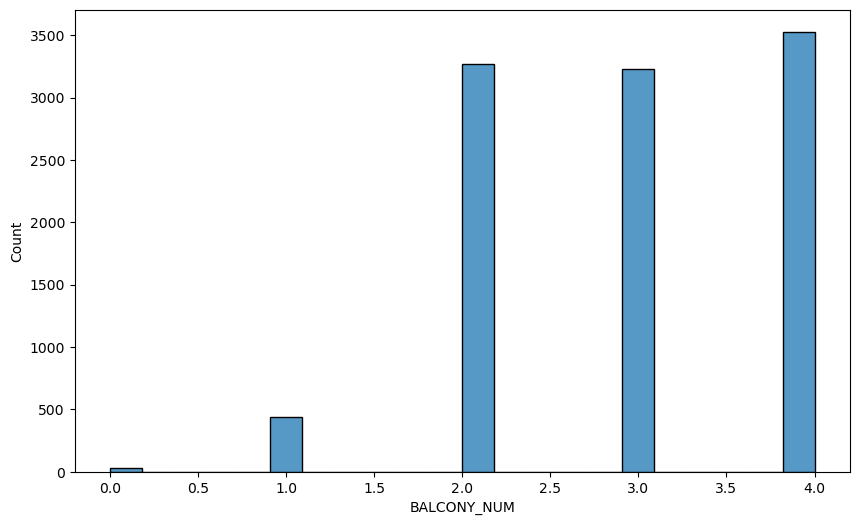

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df3,x=df['BALCONY_NUM'])
# plt.vlines(df['BALCONY_NUM'].mean(),ymin=0,ymax=9000)
plt.show()

In [25]:
#we can drop nan values
df4.dropna(inplace=True)

In [26]:
df4.isna().sum()

PROPERTY_TYPE           0
LOCALITY                0
BEDROOM_NUM             0
BATHROOM_NUM            0
BALCONY_NUM             0
PRICE_PER_UNIT_AREA     0
TOTAL_FLOOR             0
MIN_PRICE               0
MAX_PRICE               0
PRICE_SQFT              0
MIN_AREA_SQFT           0
MAX_AREA_SQFT           0
FORMATTED               0
AREA                    0
PRICE                   0
TOTAL_LANDMARK_COUNT    0
location                0
dtype: int64

In [27]:
df4.duplicated().sum()

2

In [28]:
df4.drop_duplicates(inplace=True)

In [29]:
df4.head()

,PROPERTY_TYPE,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Residential Apartment,Sector 84 Gurgaon,4.0,4,4.0,8766.0,26.0,26300000,26300000,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,2.63 Cr,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Residential Apartment,Sector 81 Gurgaon,4.0,4,3.0,21176.0,29.0,36000000,36000000,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,3.6 Cr,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,Residential Apartment,Sector 66 Gurgaon,3.0,3,2.0,43.0,17.0,85000,85000,43.0,181.160850,181.160850,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",1950 sq.ft.,"85,000",14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Residential Apartment,Sector 112 Gurgaon,3.0,3,3.0,13740.0,28.0,38500000,38500000,13740.0,260.314206,260.314206,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2802 sq.ft.,3.85 Cr,8.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4,Residential Apartment,Sector 104 Gurgaon,3.0,4,4.0,17.0,27.0,40000,40000,17.0,212.747870,212.747870,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2290 sq.ft.,"40,000",14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


### Analyze the PROPERTY_TYPE

In [30]:
df['PROPERTY_TYPE'].value_counts()

Residential Apartment        6999
Independent/Builder Floor    2805
Independent House/Villa       717
Residential Land              183
Name: PROPERTY_TYPE, dtype: int64

In [31]:
#we can drop PROPERTY_TYPE
df4.drop("PROPERTY_TYPE",axis = 1, inplace = True )

### Analyze the LOCALITY

In [32]:
locality_counts = df4['LOCALITY'].value_counts()

In [33]:
locality_counts

Sector 65 Gurgaon                  356
Sector 48 Gurgaon                  275
Sector 102 Gurgaon                 271
Sector 54 Gurgaon                  268
DLF Phase 2                        265
                                  ... 
New Palam Vihar Phase 1              1
Block D New Palam Vihar Phase 2      1
Block D, New Palam Vihar             1
Shyam Kunj                           1
Sector 1A IMT Manesar                1
Name: LOCALITY, Length: 213, dtype: int64

In [34]:
location_counts_less_than_10 = locality_counts[locality_counts<10]

In [35]:
location_counts_less_than_10

Sector 95A Gurgaon                 9
Sector 14 Gurgaon                  9
Chakkarpur                         8
Sector 9 Gurgaon                   8
Sector 39 Gurgaon                  7
                                  ..
New Palam Vihar Phase 1            1
Block D New Palam Vihar Phase 2    1
Block D, New Palam Vihar           1
Shyam Kunj                         1
Sector 1A IMT Manesar              1
Name: LOCALITY, Length: 104, dtype: int64

In [36]:
df4["LOCALITY"] = df4["LOCALITY"].apply(lambda x: "other" if x in location_counts_less_than_10 else x)

In [37]:
df4['LOCALITY'].value_counts()

Sector 65 Gurgaon       356
Sector 48 Gurgaon       275
Sector 102 Gurgaon      271
other                   269
Sector 54 Gurgaon       268
                       ... 
Sector 4 Gurgaon         12
Sector 110 A Gurgaon     12
Sushant Lok              11
Sector 27 Gurgaon        11
Mayfield Garden          11
Name: LOCALITY, Length: 110, dtype: int64

In [38]:
df4.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Sector 84 Gurgaon,4.0,4,4.0,8766.0,26.0,26300000,26300000,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,2.63 Cr,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Sector 81 Gurgaon,4.0,4,3.0,21176.0,29.0,36000000,36000000,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,3.6 Cr,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,Sector 66 Gurgaon,3.0,3,2.0,43.0,17.0,85000,85000,43.0,181.160850,181.160850,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",1950 sq.ft.,"85,000",14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Sector 112 Gurgaon,3.0,3,3.0,13740.0,28.0,38500000,38500000,13740.0,260.314206,260.314206,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2802 sq.ft.,3.85 Cr,8.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4,Sector 104 Gurgaon,3.0,4,4.0,17.0,27.0,40000,40000,17.0,212.747870,212.747870,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2290 sq.ft.,"40,000",14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


#### BEDROOM_NUM and BATHROOM_NUM

In [39]:
df4['BEDROOM_NUM'].value_counts()

3.0     4930
4.0     3136
2.0     1685
5.0      360
1.0       90
6.0       61
9.0       47
10.0      31
7.0       28
8.0       18
12.0      18
11.0       6
16.0       4
22.0       4
18.0       3
21.0       3
19.0       2
20.0       2
14.0       2
17.0       1
Name: BEDROOM_NUM, dtype: int64

In [40]:
df4['BATHROOM_NUM'].value_counts()

3     3498
4     3323
2     1930
5     1007
6      335
1      101
7       84
9       46
8       36
10      28
12      15
18       6
11       5
22       4
21       3
19       2
14       2
16       2
20       2
17       1
15       1
Name: BATHROOM_NUM, dtype: int64

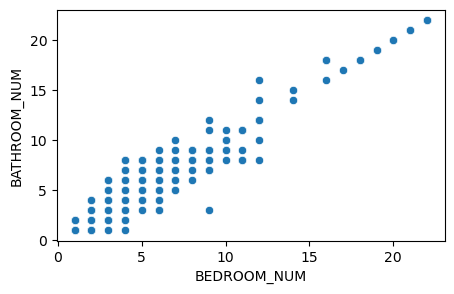

In [41]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df4,y='BATHROOM_NUM',x='BEDROOM_NUM')
plt.show()

### Here we can see there are more bathrooms than rooms which is not so common so we can drop this columns

In [42]:
df4[(df4['BEDROOM_NUM']+2< df4['BATHROOM_NUM'])]

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
558,Sector 56 Gurgaon,6.0,9,3.0,208055.0,3.0,74900000,74900000,208055.0,301.005720,301.005720,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3240 sq.ft.,7.49 Cr,47.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1730,Sector 28 Gurgaon,5.0,8,4.0,9482.0,17.0,55000000,55000000,9482.0,538.837400,538.837400,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",5800 sq.ft.,5.5 Cr,48.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2665,Sector 59 Gurgaon,3.0,6,4.0,19765.0,30.0,59000000,59000000,19765.0,277.315455,277.315455,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2985 sq.ft.,5.9 Cr,15.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2686,Sector 42 Gurgaon,4.0,8,3.0,66216.0,38.0,490000000,490000000,66216.0,687.482200,687.482200,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",7400 sq.ft.,49 Cr,15.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2701,Sector 42 Gurgaon,4.0,7,3.0,0.0,38.0,0,0,0.0,690.269290,690.269290,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",7430 sq.ft.,Price on Request,15.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2764,Sector 112 Gurgaon,4.0,7,4.0,11838.0,28.0,57500000,57500000,11838.0,451.229871,451.229871,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",4857 sq.ft.,5.75 Cr,8.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2872,Sector 59 Gurgaon,3.0,6,4.0,18512.0,30.0,56000000,56000000,18512.0,281.031575,281.031575,"{'AVAIL': {'AVAILABILITY': 1, 'SUB_AVAILABILIT...",3025 sq.ft.,5.6 Cr,15.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4430,Sector 33 Gurgaon,5.0,8,4.0,201923.0,4.0,105000000,105000000,201923.0,434.786040,434.786040,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",4680 sq.ft.,Price on Request,46.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
5134,Sector 103 Gurgaon,4.0,7,4.0,6122.0,18.0,30000003,30000003,6122.0,455.224700,455.224700,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",4900 sq.ft.,3 Cr,15.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
5281,Sector 42 Gurgaon,4.0,7,4.0,40603.0,17.0,235500000,235500000,40603.0,538.837400,538.837400,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",5800 sq.ft.,23.55 Cr,12.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [43]:
df5 = df4[~(df4['BEDROOM_NUM']+2 < df4['BATHROOM_NUM'])]

In [44]:
df5.shape

(10403, 16)

In [45]:
# we can drop BALCONY_NUM
df5.drop('BALCONY_NUM',axis=1,inplace=True)

In [46]:
df5.shape

(10403, 15)

#### PRICE_PER_UNIT_AREA

In [47]:
round(df5['PRICE_PER_UNIT_AREA'].describe(),2)

count      10403.00
mean       31131.75
std        90486.85
min            0.00
25%         8333.00
50%        11764.00
75%        17142.00
max      6333333.00
Name: PRICE_PER_UNIT_AREA, dtype: float64

In [48]:
# Lets consider the minimum price per unit area be around 5000
df6=df5[~(df5['PRICE_PER_UNIT_AREA']<5000)]

In [49]:
df6.shape

(9623, 15)

In [50]:
round(df6['PRICE_PER_UNIT_AREA'].describe(),2)

count       9623.00
mean       33556.94
std        93663.60
min         5000.00
25%         9032.00
50%        12342.00
75%        17975.00
max      6333333.00
Name: PRICE_PER_UNIT_AREA, dtype: float64

In [51]:
df6.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Sector 84 Gurgaon,4.0,4,8766.0,26.0,26300000,26300000,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,2.63 Cr,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Sector 81 Gurgaon,4.0,4,21176.0,29.0,36000000,36000000,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,3.6 Cr,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Sector 112 Gurgaon,3.0,3,13740.0,28.0,38500000,38500000,13740.0,260.314206,260.314206,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2802 sq.ft.,3.85 Cr,8.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
5,Sector 104 Gurgaon,3.0,4,8515.0,27.0,19500000,19500000,8515.0,212.747870,212.747870,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2290 sq.ft.,1.95 Cr,14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
7,Sector 74 Gurgaon,2.0,2,11571.0,30.0,16200000,16200000,11571.0,130.064200,130.064200,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",1400 sq.ft.,1.62 Cr,13.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


#### TOTAL_FLOOR
#Here we can drop Total_floor since it might not have any effect on the price

In [52]:
df6.drop('TOTAL_FLOOR',axis=1,inplace=True)

### Now let's check min_price and max_price

In [53]:
df6['MIN_PRICE'] 

0        26300000
1        36000000
3        38500000
5        19500000
7        16200000
           ...   
10699    25000000
10700    13500000
10701    12900000
10702    13000000
10703    48000000
Name: MIN_PRICE, Length: 9623, dtype: int64

In [54]:
df['MAX_PRICE']

0        26300000
1        36000000
2           85000
3        38500000
4           40000
           ...   
10699    25000000
10700    13500000
10701    12900000
10702    13000000
10703    48000000
Name: MAX_PRICE, Length: 10704, dtype: int64

In [55]:
df6[df6['MAX_PRICE']==df6['MIN_PRICE']]

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,MIN_PRICE,MAX_PRICE,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Sector 84 Gurgaon,4.0,4,8766.0,26300000,26300000,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,2.63 Cr,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Sector 81 Gurgaon,4.0,4,21176.0,36000000,36000000,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,3.6 Cr,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Sector 112 Gurgaon,3.0,3,13740.0,38500000,38500000,13740.0,260.314206,260.314206,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2802 sq.ft.,3.85 Cr,8.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
5,Sector 104 Gurgaon,3.0,4,8515.0,19500000,19500000,8515.0,212.747870,212.747870,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2290 sq.ft.,1.95 Cr,14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
7,Sector 74 Gurgaon,2.0,2,11571.0,16200000,16200000,11571.0,130.064200,130.064200,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",1400 sq.ft.,1.62 Cr,13.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,Sector 81 Gurgaon,3.0,2,11887.0,25000000,25000000,11887.0,195.375009,195.375009,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2103 sq.ft.,2.5 Cr,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
10700,Sector 83 Gurgaon,3.0,2,9100.0,13500000,13500000,9100.0,134.709350,134.709350,"{'AVAIL': {'AVAILABILITY': 1, 'SUB_AVAILABILIT...",1450 sq.ft.,1.35 Cr,11.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
10701,Sector 83 Gurgaon,3.0,2,8896.0,12900000,12900000,8896.0,134.709350,134.709350,"{'AVAIL': {'AVAILABILITY': 1, 'SUB_AVAILABILIT...",1450 sq.ft.,1.29 Cr,11.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
10702,Sector 83 Gurgaon,3.0,2,8965.0,13000000,13000000,8965.0,134.709350,134.709350,"{'AVAIL': {'AVAILABILITY': 1, 'SUB_AVAILABILIT...",1450 sq.ft.,1.3 Cr,11.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


### Now we can take any one of these columns and rename it into price and can compare it with PRICE column

In [56]:
#droping df6['MIN_PRICE'] 
df6.drop('MIN_PRICE',axis=1,inplace=True)

In [57]:
#RENAME df6['MAX_PRICE'] TO price

df7=df6.rename(columns={'MAX_PRICE':'price'})

In [58]:
df7.head(2)

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,price,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Sector 84 Gurgaon,4.0,4,8766.0,26300000,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,2.63 Cr,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Sector 81 Gurgaon,4.0,4,21176.0,36000000,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,3.6 Cr,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


### now we can compare price and PRICE

In [59]:
df7['price']

0        26300000
1        36000000
3        38500000
5        19500000
7        16200000
           ...   
10699    25000000
10700    13500000
10701    12900000
10702    13000000
10703    48000000
Name: price, Length: 9623, dtype: int64

In [60]:
df7['PRICE'].unique()

array(['2.63 Cr', '3.6 Cr', '3.85 Cr', '1.95 Cr', '1.62 Cr', '2.2 Cr',
       '7.5 Cr', '1.6 Cr', '3.5 Cr', '4.5 Cr', '1.55 Cr', '1.9 Cr',
       '4.95 Cr', '1.3 Cr', '1.15 Cr', '2.1 Cr', '6.35 Cr', '3.56 Cr',
       '2.25 Cr', '6.1 Cr', '2 Cr', '4.25 Cr', '3.1 Cr', '1.5 Cr',
       '18 Cr', '1.66 Cr', '2.45 Cr', '2.5 Cr', '2.4 Cr', '1.7 Cr',
       '3.3 Cr', '3.75 Cr', '1.23 Cr', '4.85 Cr', '2.3 Cr', '5.5 Cr',
       '3.21 Cr', '3.14 Cr', '4.21 Cr', '4.03 Cr', '2.94 Cr', '2.34 Cr',
       '2.71 Cr', '1.38 Cr', '2.77 Cr', '4.8 Cr', '79.75 L', '80 L',
       '3.4 Cr', '5.25 Cr', '5 Cr', '6 Cr', '3 Cr', '5.1 Cr', '10.35 Cr',
       '9.6 Cr', '1.27 Cr', '1.1 Cr', '1.45 Cr', '5.45 Cr', '95 L',
       '3.79 Cr', '2.35 Cr', '2.15 Cr', '1.89 Cr', '1.43 Cr', '1.07 Cr',
       '1.05 Cr', '1.4 Cr', '1.86 Cr', '8 Cr', '10.7 Cr', '1.35 Cr',
       '1.37 Cr', '1.8 Cr', '1.39 Cr', '2.6 Cr', '2.38 Cr', '3.2 Cr',
       '1.46 Cr', '1.76 Cr', '3.25 Cr', '6.45 Cr', '2.52 Cr', '2.61 Cr',
       '1.92 Cr'

### df7['PRICE'] WE CAN CONVERT INTO FLOAT

In [61]:
def convert_cr(price):
    if "cr" in price.lower():
        l = price.split(" ")
        p = float(l[0])
        return p*10000000
    elif "l" in price.lower():
        l = price.split(" ")
        p = float(l[0])
        return p*100000


In [62]:
df7["PRICE"] = df7["PRICE"].apply(convert_cr)

In [63]:
df7.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,price,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Sector 84 Gurgaon,4.0,4,8766.0,26300000,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,26300000.0,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Sector 81 Gurgaon,4.0,4,21176.0,36000000,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,36000000.0,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Sector 112 Gurgaon,3.0,3,13740.0,38500000,13740.0,260.314206,260.314206,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2802 sq.ft.,38500000.0,8.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
5,Sector 104 Gurgaon,3.0,4,8515.0,19500000,8515.0,212.747870,212.747870,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2290 sq.ft.,19500000.0,14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
7,Sector 74 Gurgaon,2.0,2,11571.0,16200000,11571.0,130.064200,130.064200,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",1400 sq.ft.,16200000.0,13.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


### Lets compare

In [64]:
df7[df7['PRICE']==df7['price']]

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,price,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Sector 84 Gurgaon,4.0,4,8766.0,26300000,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,26300000.0,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Sector 81 Gurgaon,4.0,4,21176.0,36000000,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,36000000.0,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Sector 112 Gurgaon,3.0,3,13740.0,38500000,13740.0,260.314206,260.314206,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2802 sq.ft.,38500000.0,8.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
5,Sector 104 Gurgaon,3.0,4,8515.0,19500000,8515.0,212.747870,212.747870,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2290 sq.ft.,19500000.0,14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
9,Sector 102 Gurgaon,3.0,3,72607.0,22000000,72607.0,253.346481,253.346481,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2727 sq.ft.,22000000.0,11.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,Sector 81 Gurgaon,3.0,2,11887.0,25000000,11887.0,195.375009,195.375009,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2103 sq.ft.,25000000.0,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
10700,Sector 83 Gurgaon,3.0,2,9100.0,13500000,9100.0,134.709350,134.709350,"{'AVAIL': {'AVAILABILITY': 1, 'SUB_AVAILABILIT...",1450 sq.ft.,13500000.0,11.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
10701,Sector 83 Gurgaon,3.0,2,8896.0,12900000,8896.0,134.709350,134.709350,"{'AVAIL': {'AVAILABILITY': 1, 'SUB_AVAILABILIT...",1450 sq.ft.,12900000.0,11.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
10702,Sector 83 Gurgaon,3.0,2,8965.0,13000000,8965.0,134.709350,134.709350,"{'AVAIL': {'AVAILABILITY': 1, 'SUB_AVAILABILIT...",1450 sq.ft.,13000000.0,11.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [65]:
df8 = df7[df7['PRICE']==df7['price']]

In [66]:
df8.shape

(8746, 13)

### Here we see both prices are almost same .So we can keep one and drop the other

In [67]:
df8.drop('price',axis=1,inplace=True)

In [68]:
df8.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,FORMATTED,AREA,PRICE,TOTAL_LANDMARK_COUNT,location
0,Sector 84 Gurgaon,4.0,4,8766.0,8766.0,319.028902,319.028902,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",3434 sq.ft.,26300000.0,10.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Sector 81 Gurgaon,4.0,4,21176.0,21176.0,266.631610,266.631610,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2870 sq.ft.,36000000.0,9.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Sector 112 Gurgaon,3.0,3,13740.0,13740.0,260.314206,260.314206,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2802 sq.ft.,38500000.0,8.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
5,Sector 104 Gurgaon,3.0,4,8515.0,8515.0,212.747870,212.747870,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2290 sq.ft.,19500000.0,14.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
9,Sector 102 Gurgaon,3.0,3,72607.0,72607.0,253.346481,253.346481,"{'AVAIL': {'AVAILABILITY': 2, 'SUB_AVAILABILIT...",2727 sq.ft.,22000000.0,11.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


### Now we can drop some unwanted columns to make the dataset simple

In [69]:
df8.columns

Index(['LOCALITY', 'BEDROOM_NUM', 'BATHROOM_NUM', 'PRICE_PER_UNIT_AREA',
       'PRICE_SQFT', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'FORMATTED', 'AREA',
       'PRICE', 'TOTAL_LANDMARK_COUNT', 'location'],
      dtype='object')

In [70]:
d = ['FORMATTED','TOTAL_LANDMARK_COUNT','location']

In [71]:
df9 = df8.drop(columns=d,axis=1)

In [72]:
df9.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,8766.0,8766.0,319.028902,319.028902,3434 sq.ft.,26300000.0
1,Sector 81 Gurgaon,4.0,4,21176.0,21176.0,266.631610,266.631610,2870 sq.ft.,36000000.0
3,Sector 112 Gurgaon,3.0,3,13740.0,13740.0,260.314206,260.314206,2802 sq.ft.,38500000.0
5,Sector 104 Gurgaon,3.0,4,8515.0,8515.0,212.747870,212.747870,2290 sq.ft.,19500000.0
9,Sector 102 Gurgaon,3.0,3,72607.0,72607.0,253.346481,253.346481,2727 sq.ft.,22000000.0


#### now check  PRICE_PER_UNIT_AREA and PRICE_SQFT

In [73]:
df9[df9['PRICE_PER_UNIT_AREA']==df9['PRICE_SQFT']]

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,PRICE_SQFT,MIN_AREA_SQFT,MAX_AREA_SQFT,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,8766.0,8766.0,319.028902,319.028902,3434 sq.ft.,26300000.0
1,Sector 81 Gurgaon,4.0,4,21176.0,21176.0,266.631610,266.631610,2870 sq.ft.,36000000.0
3,Sector 112 Gurgaon,3.0,3,13740.0,13740.0,260.314206,260.314206,2802 sq.ft.,38500000.0
5,Sector 104 Gurgaon,3.0,4,8515.0,8515.0,212.747870,212.747870,2290 sq.ft.,19500000.0
9,Sector 102 Gurgaon,3.0,3,72607.0,72607.0,253.346481,253.346481,2727 sq.ft.,22000000.0
...,...,...,...,...,...,...,...,...,...
10699,Sector 81 Gurgaon,3.0,2,11887.0,11887.0,195.375009,195.375009,2103 sq.ft.,25000000.0
10700,Sector 83 Gurgaon,3.0,2,9100.0,9100.0,134.709350,134.709350,1450 sq.ft.,13500000.0
10701,Sector 83 Gurgaon,3.0,2,8896.0,8896.0,134.709350,134.709350,1450 sq.ft.,12900000.0
10702,Sector 83 Gurgaon,3.0,2,8965.0,8965.0,134.709350,134.709350,1450 sq.ft.,13000000.0


#### Here, we observe that the price_sqft and price_per_unit_area columns contain identical values. To avoid redundancy, we can retain one of these columns and remove the other for cleaner and more efficient data analysi

In [74]:
df9.drop('PRICE_SQFT',axis=1,inplace=True)

In [75]:
df9.shape

(8746, 8)

In [76]:
df9.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,MIN_AREA_SQFT,MAX_AREA_SQFT,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,8766.0,319.028902,319.028902,3434 sq.ft.,26300000.0
1,Sector 81 Gurgaon,4.0,4,21176.0,266.631610,266.631610,2870 sq.ft.,36000000.0
3,Sector 112 Gurgaon,3.0,3,13740.0,260.314206,260.314206,2802 sq.ft.,38500000.0
5,Sector 104 Gurgaon,3.0,4,8515.0,212.747870,212.747870,2290 sq.ft.,19500000.0
9,Sector 102 Gurgaon,3.0,3,72607.0,253.346481,253.346481,2727 sq.ft.,22000000.0


#### Analyze  MIN_AREA_SQFT and MAX_AREA_SQFT

In [77]:
df9[df9['MIN_AREA_SQFT']==df9['MAX_AREA_SQFT']]

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,MIN_AREA_SQFT,MAX_AREA_SQFT,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,8766.0,319.028902,319.028902,3434 sq.ft.,26300000.0
1,Sector 81 Gurgaon,4.0,4,21176.0,266.631610,266.631610,2870 sq.ft.,36000000.0
3,Sector 112 Gurgaon,3.0,3,13740.0,260.314206,260.314206,2802 sq.ft.,38500000.0
5,Sector 104 Gurgaon,3.0,4,8515.0,212.747870,212.747870,2290 sq.ft.,19500000.0
9,Sector 102 Gurgaon,3.0,3,72607.0,253.346481,253.346481,2727 sq.ft.,22000000.0
...,...,...,...,...,...,...,...,...
10699,Sector 81 Gurgaon,3.0,2,11887.0,195.375009,195.375009,2103 sq.ft.,25000000.0
10700,Sector 83 Gurgaon,3.0,2,9100.0,134.709350,134.709350,1450 sq.ft.,13500000.0
10701,Sector 83 Gurgaon,3.0,2,8896.0,134.709350,134.709350,1450 sq.ft.,12900000.0
10702,Sector 83 Gurgaon,3.0,2,8965.0,134.709350,134.709350,1450 sq.ft.,13000000.0


### Since both columns have identical values, we can retain one and drop the other to simplify the dataset

In [78]:
df9.drop('MIN_AREA_SQFT',axis=1,inplace=True)

In [79]:
#rename  MAX_AREA_SQFT to AREASQFT

In [80]:
df9.rename(columns={'MAX_AREA_SQFT':'AREASQFT'},inplace=True)

In [81]:
df9['AREASQFT'].describe()

count    8746.000000
mean      222.129501
std       127.374531
min         2.787090
25%       150.502860
50%       197.047263
75%       259.199370
max      2257.542900
Name: AREASQFT, dtype: float64

#### here we can see min area sqft is 2 , which cannot be possible let's filter the data by considering 100 as min_area_sqft

In [82]:
df10 = df9[~(df9['AREASQFT']<100)]

In [83]:
df10.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,AREASQFT,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,8766.0,319.028902,3434 sq.ft.,26300000.0
1,Sector 81 Gurgaon,4.0,4,21176.0,266.631610,2870 sq.ft.,36000000.0
3,Sector 112 Gurgaon,3.0,3,13740.0,260.314206,2802 sq.ft.,38500000.0
5,Sector 104 Gurgaon,3.0,4,8515.0,212.747870,2290 sq.ft.,19500000.0
9,Sector 102 Gurgaon,3.0,3,72607.0,253.346481,2727 sq.ft.,22000000.0


In [84]:
df10.shape

(8206, 7)

In [85]:
# Analyze the column AREA

In [86]:
df10['AREA']

0        3434 sq.ft.
1        2870 sq.ft.
3        2802 sq.ft.
5        2290 sq.ft.
9        2727 sq.ft.
            ...     
10699    2103 sq.ft.
10700    1450 sq.ft.
10701    1450 sq.ft.
10702    1450 sq.ft.
10703    3200 sq.ft.
Name: AREA, Length: 8206, dtype: object

In [87]:
def convert_to_num(area):
    if "-" in area:
        right = float(area.split("-")[0])
        left = float(area.split("-")[0].split(" ")[0])
        return (right+left)/2
    else:
        area = area.split(" ")
        return float(area[0])


In [88]:
df10["AREA"] = df10["AREA"].apply(convert_to_num)

In [89]:
df10.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,AREASQFT,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,8766.0,319.028902,3434.0,26300000.0
1,Sector 81 Gurgaon,4.0,4,21176.0,266.631610,2870.0,36000000.0
3,Sector 112 Gurgaon,3.0,3,13740.0,260.314206,2802.0,38500000.0
5,Sector 104 Gurgaon,3.0,4,8515.0,212.747870,2290.0,19500000.0
9,Sector 102 Gurgaon,3.0,3,72607.0,253.346481,2727.0,22000000.0


In [90]:
df10['AREASQFT'].describe()

count    8206.000000
mean      232.391216
std       124.716986
min       100.149434
25%       160.722190
50%       203.643376
75%       263.472908
max      2257.542900
Name: AREASQFT, dtype: float64

In [91]:
df10['PRICE_PER_UNIT_AREA'].describe()

count    8.206000e+03
mean     3.380415e+04
std      9.244968e+04
min      5.000000e+03
25%      9.302000e+03
50%      1.268250e+04
75%      1.875000e+04
max      6.333333e+06
Name: PRICE_PER_UNIT_AREA, dtype: float64

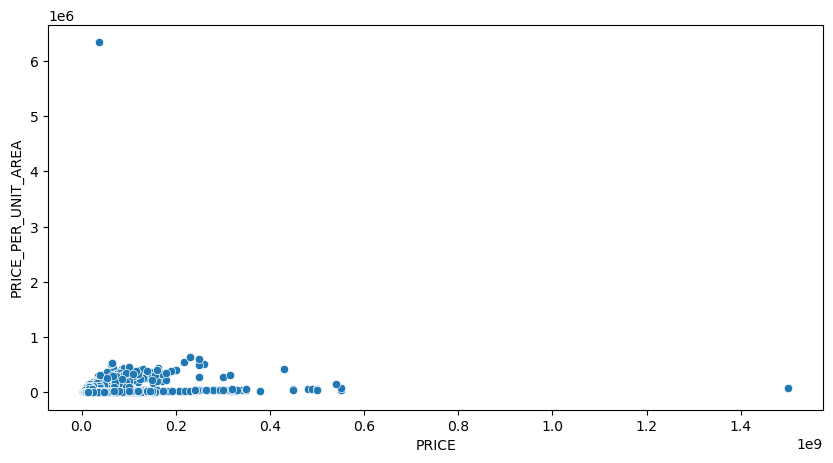

In [92]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PRICE',y='PRICE_PER_UNIT_AREA',data=df10)
plt.show()

### here we can drop these two columns

In [93]:
df11 = df10.drop(['PRICE_PER_UNIT_AREA','AREASQFT'],axis=1)

In [94]:
df11.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,3434.0,26300000.0
1,Sector 81 Gurgaon,4.0,4,2870.0,36000000.0
3,Sector 112 Gurgaon,3.0,3,2802.0,38500000.0
5,Sector 104 Gurgaon,3.0,4,2290.0,19500000.0
9,Sector 102 Gurgaon,3.0,3,2727.0,22000000.0


### check outliers

In [95]:
# we can visualize the price and area 

<Axes: xlabel='AREA', ylabel='PRICE'>

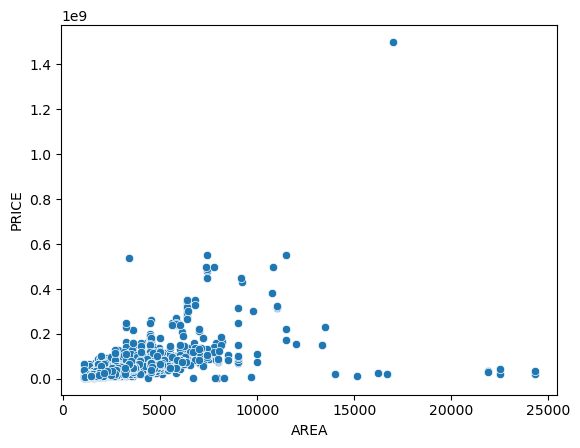

In [96]:
sns.scatterplot(x="AREA",y="PRICE",data = df11)

In [97]:
df11[((df11["AREA"]>10000)&(df11["PRICE"]<50000000))]

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,AREA,PRICE
805,Sushant Lok Phase 3,4.0,5,24300.0,21000000.0
834,Sector 55 Gurgaon,3.0,3,22500.0,20000000.0
1801,DLF Phase 2,3.0,4,16200.0,24800000.0
1802,DLF Phase 4,3.0,3,21870.0,32500000.0
2721,Palam Vihar,3.0,3,14013.0,23000000.0
3541,Palam Vihar,5.0,4,21870.0,30000000.0
5487,Sushant Lok Phase 1,4.0,4,24300.0,35000000.0
6244,Sector 63 Gurgaon,4.0,4,22500.0,42000000.0
8517,Sector 102 Gurgaon,3.0,3,16668.0,20200000.0
9794,Sector-33 Sohna,2.0,2,15123.0,11700000.0


In [98]:
df11 = df11[~((df11["AREA"]>10000)&(df11["PRICE"]<50000000))]

In [99]:
df11

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,3434.0,26300000.0
1,Sector 81 Gurgaon,4.0,4,2870.0,36000000.0
3,Sector 112 Gurgaon,3.0,3,2802.0,38500000.0
5,Sector 104 Gurgaon,3.0,4,2290.0,19500000.0
9,Sector 102 Gurgaon,3.0,3,2727.0,22000000.0
...,...,...,...,...,...
10699,Sector 81 Gurgaon,3.0,2,2103.0,25000000.0
10700,Sector 83 Gurgaon,3.0,2,1450.0,13500000.0
10701,Sector 83 Gurgaon,3.0,2,1450.0,12900000.0
10702,Sector 83 Gurgaon,3.0,2,1450.0,13000000.0


In [100]:
df11[(df11["PRICE"] > 1400000000)]

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,AREA,PRICE
632,Sector 42 Gurgaon,10.0,11,17000.0,1.500000e+09


In [101]:
df11 = df11[~(df11["PRICE"] > 1400000000)]

In [102]:
df11

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4,3434.0,26300000.0
1,Sector 81 Gurgaon,4.0,4,2870.0,36000000.0
3,Sector 112 Gurgaon,3.0,3,2802.0,38500000.0
5,Sector 104 Gurgaon,3.0,4,2290.0,19500000.0
9,Sector 102 Gurgaon,3.0,3,2727.0,22000000.0
...,...,...,...,...,...
10699,Sector 81 Gurgaon,3.0,2,2103.0,25000000.0
10700,Sector 83 Gurgaon,3.0,2,1450.0,13500000.0
10701,Sector 83 Gurgaon,3.0,2,1450.0,12900000.0
10702,Sector 83 Gurgaon,3.0,2,1450.0,13000000.0


In [103]:
 n_col = df11.select_dtypes(include='number')

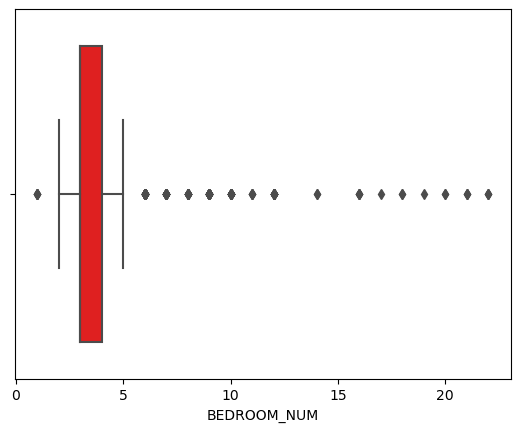

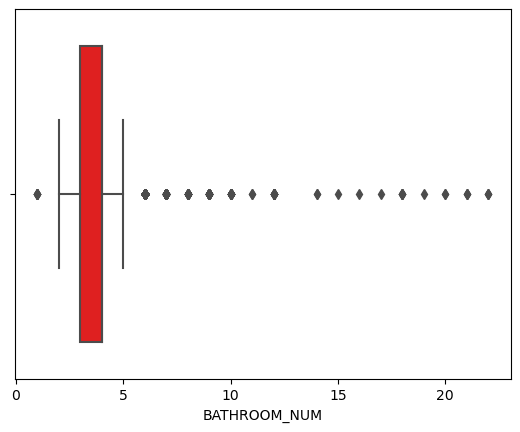

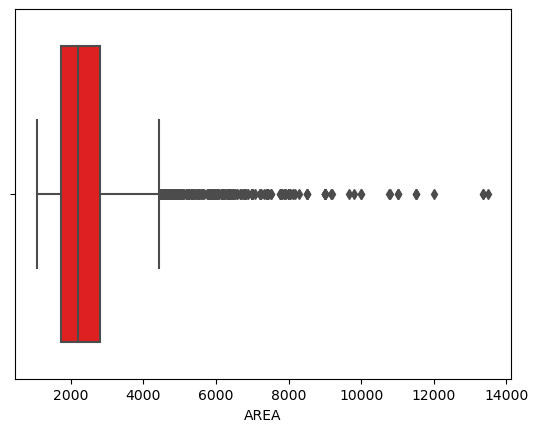

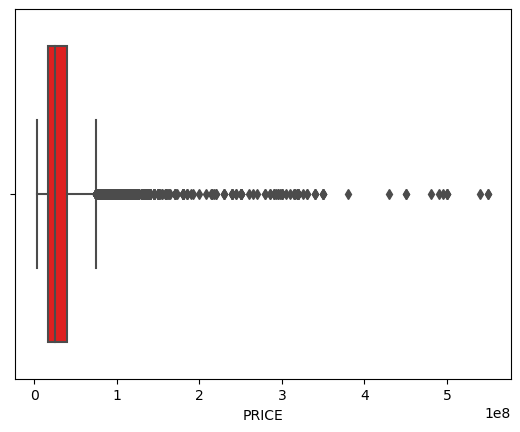

In [104]:
for col in n_col:
    sns.boxplot(x=col,data=df11,color='r')
    plt.show()

## Remove outliers using IQR method

In [105]:
# IQR Method
def outliers(df11):
    for col in df11.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df11[col].quantile(0.25)
        Q3 = df11[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df11[col] = df11[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df11

In [106]:
df12 = outliers(df11)

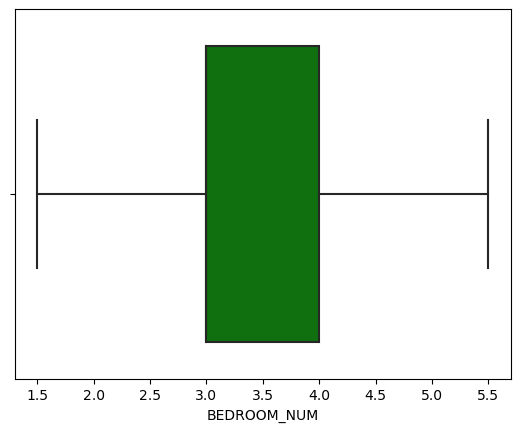

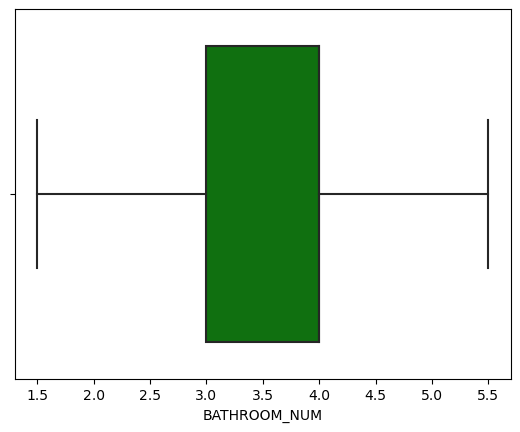

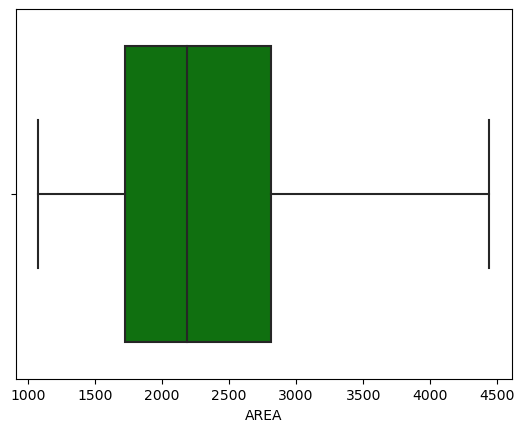

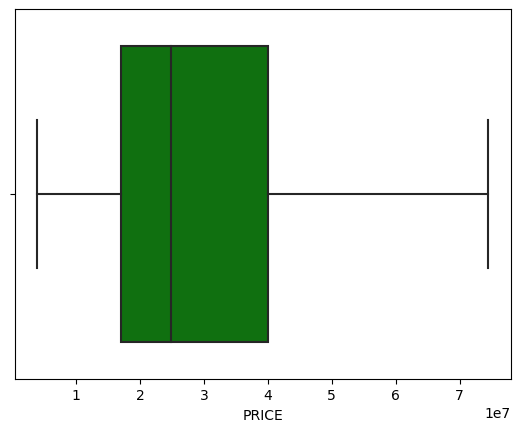

In [107]:
for col in n_col:
    sns.boxplot(x=col,data=df12,color='g')
    plt.show()

In [108]:
df12.head()

,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,AREA,PRICE
0,Sector 84 Gurgaon,4.0,4.0,3434.0,26300000.0
1,Sector 81 Gurgaon,4.0,4.0,2870.0,36000000.0
3,Sector 112 Gurgaon,3.0,3.0,2802.0,38500000.0
5,Sector 104 Gurgaon,3.0,4.0,2290.0,19500000.0
9,Sector 102 Gurgaon,3.0,3.0,2727.0,22000000.0


In [109]:
df12['LOCALITY'] # do lebelcoding

0         Sector 84 Gurgaon
1         Sector 81 Gurgaon
3        Sector 112 Gurgaon
5        Sector 104 Gurgaon
9        Sector 102 Gurgaon
                ...        
10699     Sector 81 Gurgaon
10700     Sector 83 Gurgaon
10701     Sector 83 Gurgaon
10702     Sector 83 Gurgaon
10703    Sector 63A Gurgaon
Name: LOCALITY, Length: 8195, dtype: object

In [110]:
dummies = pd.get_dummies(df12["LOCALITY"],drop_first=True).astype(int)

In [111]:
df13 = pd.concat([dummies,df12],axis=1)

In [112]:
df13

,Ardee City,B Block Sushant Lok Phase 1,C Block Sushant Lok Phase 1,DLF Phase 1,DLF Phase 2,DLF Phase 3,DLF Phase 4,DLF Phase 5,Greenwood City,Gwal Pahari,...,Sushant Lok Phase 3,Uppals Southend,Valley View Estate,other,sector 58 Gurgaon,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,AREA,PRICE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 84 Gurgaon,4.0,4.0,3434.0,26300000.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 81 Gurgaon,4.0,4.0,2870.0,36000000.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 112 Gurgaon,3.0,3.0,2802.0,38500000.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 104 Gurgaon,3.0,4.0,2290.0,19500000.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 102 Gurgaon,3.0,3.0,2727.0,22000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 81 Gurgaon,3.0,2.0,2103.0,25000000.0
10700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 83 Gurgaon,3.0,2.0,1450.0,13500000.0
10701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 83 Gurgaon,3.0,2.0,1450.0,12900000.0
10702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sector 83 Gurgaon,3.0,2.0,1450.0,13000000.0


In [113]:
df13.drop('LOCALITY',axis=1,inplace=True)

In [114]:
# df13.skew()

In [115]:
# from sklearn.preprocessing import PowerTransformer

In [116]:
# pt = PowerTransformer(method='yeo-johnson')

In [117]:
# numerical_features = df13.select_dtypes(include=['float64','int64']).columns

In [118]:
# df13[numerical_features] = pt.fit_transform(df13[numerical_features])

In [119]:
# df13[numerical_features].skew()

In [120]:
# df13[numerical_features].head()

In [121]:
df13.head()

,Ardee City,B Block Sushant Lok Phase 1,C Block Sushant Lok Phase 1,DLF Phase 1,DLF Phase 2,DLF Phase 3,DLF Phase 4,DLF Phase 5,Greenwood City,Gwal Pahari,...,Sushant Lok Phase 2,Sushant Lok Phase 3,Uppals Southend,Valley View Estate,other,sector 58 Gurgaon,BEDROOM_NUM,BATHROOM_NUM,AREA,PRICE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.0,4.0,3434.0,26300000.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.0,4.0,2870.0,36000000.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.0,3.0,2802.0,38500000.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.0,4.0,2290.0,19500000.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.0,3.0,2727.0,22000000.0


## Scaling

In [143]:
X = df13.drop("PRICE",axis =1)

In [147]:
y = df13["PRICE"]

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()

In [153]:
x_scaled = scaler.fit_transform(X)

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [157]:
models={
    '1. Linear Regression':LinearRegression(),
    '2. Decision Tree Regressor':DecisionTreeRegressor(),
    '3. Random Forest Regressor':RandomForestRegressor(), 
    '4. Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    '5. Support Vector Regressor':SVR(),
    '6. MLPRegressor':MLPRegressor(),
    '7. AdaBoostRegressor':AdaBoostRegressor()
}

In [158]:
# MODEL EVALUATION
results={} # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(X_train,y_train)  
    # make the prediction
    y_pred = model.predict(X_test)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R²": r2,}

In [159]:
results_df = pd.DataFrame(results).T

In [160]:
results_df

,MSE,MAE,RMSE,R²
1. Linear Regression,8.147469e+13,6.478264e+06,9.026333e+06,0.768636
2. Decision Tree Regressor,6.918649e+13,4.269400e+06,8.317842e+06,0.803531
3. Random Forest Regressor,5.128262e+13,3.838570e+06,7.161188e+06,0.854372
4. Gradiant Boosting Regressor,7.389080e+13,6.114364e+06,8.595976e+06,0.790172
5. Support Vector Regressor,3.793179e+14,1.412552e+07,1.947608e+07,-0.077152
6. MLPRegressor,1.262699e+15,3.018666e+07,3.553447e+07,-2.585696
7. AdaBoostRegressor,1.398953e+14,9.604732e+06,1.182773e+07,0.602738


In [176]:
# best_model = results_df.loc[results_df['R²'].idxmax()]
# print(round(best_model,2))

In [179]:
# best_model

In [188]:
bst_mdl = results_df.sort_values(by='R²',ascending=False)   #.iloc[0]

In [189]:
bst_mdl

,MSE,MAE,RMSE,R²
3. Random Forest Regressor,5.128262e+13,3.838570e+06,7.161188e+06,0.854372
2. Decision Tree Regressor,6.918649e+13,4.269400e+06,8.317842e+06,0.803531
4. Gradiant Boosting Regressor,7.389080e+13,6.114364e+06,8.595976e+06,0.790172
1. Linear Regression,8.147469e+13,6.478264e+06,9.026333e+06,0.768636
7. AdaBoostRegressor,1.398953e+14,9.604732e+06,1.182773e+07,0.602738
5. Support Vector Regressor,3.793179e+14,1.412552e+07,1.947608e+07,-0.077152
6. MLPRegressor,1.262699e+15,3.018666e+07,3.553447e+07,-2.585696


In [167]:
md = RandomForestRegressor(n_estimators=100)

In [169]:
md.fit(X_train,y_train)

RandomForestRegressor()

In [172]:
yp = md.predict(X_test)

In [174]:
#evaluation matrics
mae = mean_absolute_error(y_test,yp)
mse = mean_squared_error(y_test,yp)
rmse = np.sqrt(mse)
r2 =r2_score(y_test,yp)

In [175]:
print(f"mae:{mae}\nmse:{mse}\nrmse:{rmse}\nr2:{r2}\n")


mae:3848401.6603994244
mse:51412145071147.71
rmse:7170226.291488136
r2:0.8540045031016034

